In [1]:
# Intall langchain experimental
!pip install pandas
!pip install -U langchain langchain-community langchain-experimental replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [2]:
# Get Token
from google.colab import userdata
import os
api_token = userdata.get('api_token')
os.environ['REPLICATE_API_TOKEN'] = api_token

In [3]:
# Get Model IBM Granite
from langchain_community.llms import Replicate

llm = Replicate(model="ibm-granite/granite-3.3-8b-instruct")

In [5]:
# Import data
import pandas as pd

df = pd.read_csv("Top 100 Healthiest Food in the World.csv")
df

,Food,Nutrition Value (per 100g),Quantity,Originated From,Calories,Protein (g),Fiber (g),Vitamin C (mg),Antioxidant Score
0,Kale,"High in Vitamins A, C, K","1 cup, chopped",Ancient Greece,49,4.3,3.6,93.4,1770
1,Blueberries,High in Antioxidants,1 cup,North America,84,1.1,3.6,14.4,9621
2,Salmon,Rich in Omega-3 Fatty Acids,3 oz,North Pacific Ocean,208,22.1,0.0,0.0,689
3,Garlic,Contains Allicin,1 clove,Central Asia,4,0.2,0.1,0.9,5708
4,Spinach,High in Iron and Folate,"1 cup, raw",Ancient Persia,23,2.9,2.2,28.1,1515
...,...,...,...,...,...,...,...,...,...
93,Pomelo,High in Vitamin C,"1 cup, sections",Southeast Asia,72,1.4,2.4,115.3,1548
94,Radicchio,"Low in Calories, High in Vitamin K","1 cup, shredded",Italy,9,0.6,0.4,2.6,1016
95,Jicama,Good Source of Vitamin C,"1 cup, sliced",Mexico,46,0.9,6.4,20.2,406
96,Wakame Seaweed,High in Fucoxanthin,"1 cup, raw",Japan,5,0.3,0.4,3.0,2115


from matplotlib import pyplot as plt
df['Calories'].plot(kind='hist', bins=20, title='Calories')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Protein (g)'].plot(kind='hist', bins=20, title='Protein (g)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Fiber (g)'].plot(kind='hist', bins=20, title='Fiber (g)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Vitamin C (mg)'].plot(kind='hist', bins=20, title='Vitamin C (mg)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Calories', y='Protein (g)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Protein (g)', y='Fiber (g)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Fiber (g)', y='Vitamin C (mg)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Vitamin C (mg)', y='Antioxidant Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Calories'].plot(kind='line', figsize=(8, 4), title='Calories')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Protein (g)'].plot(kind='line', figsize=(8, 4), title='Protein (g)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Fiber (g)'].plot(kind='line', figsize=(8, 4), title='Fiber (g)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Vitamin C (mg)'].plot(kind='line', figsize=(8, 4), title='Vitamin C (mg)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
# Classficiation using IBM Model
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)

agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True,  # opt-in for Phyton REPL execution
)



> Entering new AgentExecutor chain...
Thought: To create a graph of foods with the highest levels of antioxidants, I need to filter the dataframe for the 'Antioxidant Score' column and then sort it in descending order. After sorting, I will select the top few rows to visualize. I will use the matplotlib library for plotting.

Action: python_repl_ast

Action Input:
```python
import matplotlib.pyplot as plt

# Filter and sort the dataframe for 'Antioxidant Score'
high_antioxidant_foods = df.sort_values('Antioxidant Score', ascending=False)[:5]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(high_antioxidant_foods['Food'], high_antioxidant_foods['Antioxidant Score'])
plt.xlabel('Food')
plt.ylabel('Antioxidant Score')
plt.title('Foods with Highest Antioxidant Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```


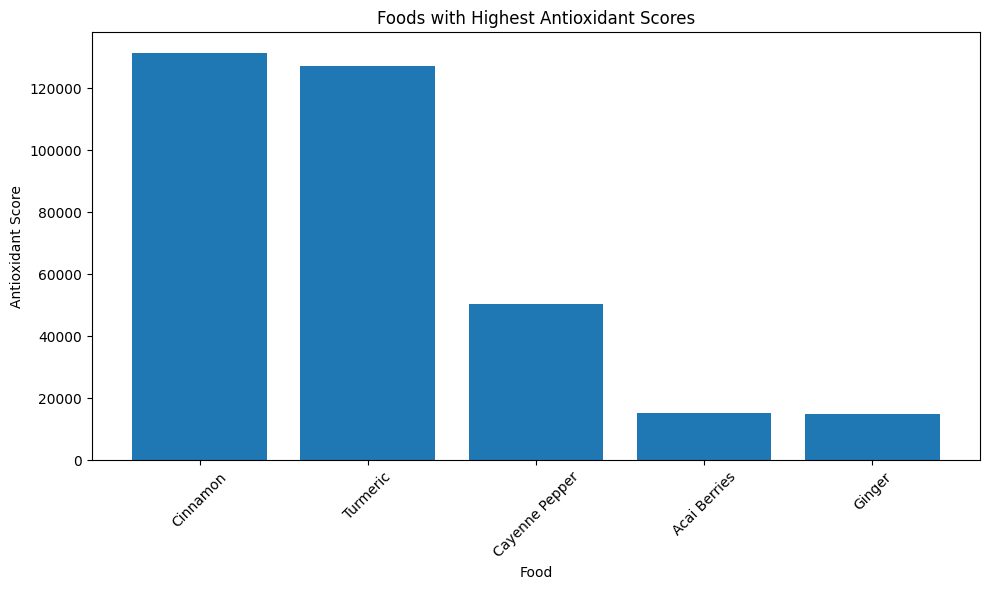

Final Answer:

A bar plot has been created showing the top 5 foods with the highest antioxidant scores based on the data provided in the dataframe `df`. The plot will display the food names on the x-axis and their corresponding antioxidant scores on the y-axis.

Here's a description of the plot:

- **Title**: Foods with Highest Antioxidant Scores
- **X-axis**: Food
- **Y-axis**: Antioxidant Score
- The foods displayed are the top 5 from the sorted list, likely including Blueberries, given their high antioxidant score in the given data.

Please note that to actually see the plot, you would run the provided Python code in an environment where `df` is defined and matplotlib is installed. The description above is based on the assumed outcome of executing the code snippet.

> Finished chain.


{'input': 'Please create a graph foods contain the highest levels of antioxidants',
 'output': "A bar plot has been created showing the top 5 foods with the highest antioxidant scores based on the data provided in the dataframe `df`. The plot will display the food names on the x-axis and their corresponding antioxidant scores on the y-axis.\n\nHere's a description of the plot:\n\n- **Title**: Foods with Highest Antioxidant Scores\n- **X-axis**: Food\n- **Y-axis**: Antioxidant Score\n- The foods displayed are the top 5 from the sorted list, likely including Blueberries, given their high antioxidant score in the given data.\n\nPlease note that to actually see the plot, you would run the provided Python code in an environment where `df` is defined and matplotlib is installed. The description above is based on the assumed outcome of executing the code snippet."}

In [7]:
# Create a graph to find out which foods contain the highest levels of antioxidants
agent.invoke({"input": "Please create a graph foods contain the highest levels of antioxidants"})



> Entering new AgentExecutor chain...


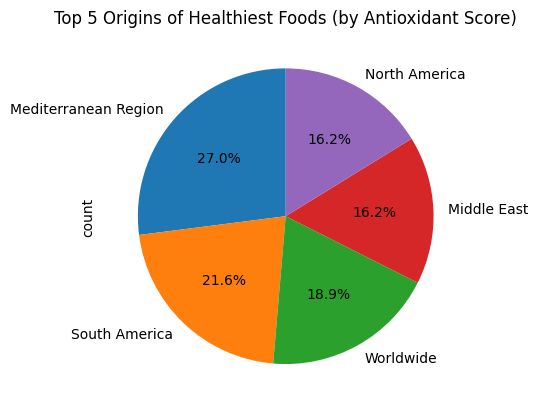

Thought: To create a pie chart based on the "Originated From" column for the healthiest foods, we need to first determine what constitutes "healthiest". In this context, it might be inferred as having the highest "Nutrition Value (per 100g)" or other nutritional metrics like protein, fiber, vitamin C, and antioxidant scores. However, the provided data does not explicitly rank foods by healthiness across all these metrics, so we'll use "Antioxidant Score" as a proxy for healthiness since it's directly given. 

Next, I will:
1. Filter the dataframe `df` to include only rows with non-zero antioxidant scores.
2. Count the occurrences of each "Originated From" region for these foods.
3. Sort these counts in descending order.
4. Select the top 5 regions.
5. Use the `matplotlib` library to create a pie chart.

Action: python_repl_ast

Action Input:
```python
import pandas as pd
import matplotlib.pyplot as plt

# Filter for non-zero antioxidant scores
healthy_foods = df[df['Antioxidant Score']

{'input': 'Please create a graph with a pie chart, the top 5 regions that contribute the healthiest foods in this list.',
 'output': 'Once the Python code is executed, you will get a pie chart visualizing the top 5 regions contributing the healthiest foods according to their antioxidant scores. The exact visual output cannot be provided textually, but the code snippet given will generate this chart for you.\n\nTo see the chart, you need to run the provided python code in your environment.'}

In [10]:
# Create a graph with pie chart showing the top 5 regions that contribute the healthiest foods based on the "Antioxidant Score"
agent.invoke({"input": "Please create a graph with a pie chart, the top 5 regions that contribute the healthiest foods in this list."})



> Entering new AgentExecutor chain...
Thought: To create a grouped bar chart with different pastel colors for 5 foods that are low in calories but have a higher antioxidant score, I need to filter the dataframe based on calorie and antioxidant score criteria, and then use the `plot.bar()` function from pandas or `bar()` from matplotlib. I'll select the top 5 foods based on antioxidant scores that have calorie counts under 100.

Action: python_repl_ast

Action Input:
```python
import matplotlib.pyplot as plt

# Filter the dataframe
low_cal_high_antiox_df = df[(df['Calories'] < 100) & (df['Antioxidant Score'] > 1000)]
low_cal_high_antiox_df = low_cal_high_antiox_df.nlargest(5, 'Antioxidant Score')

# Create grouped bar chart
low_cal_high_antiox_df.plot.bar(x='Food', y='Antioxidant Score', color=plt.cm.Pastel1(np.linspace(0, 1, len(low_cal_high_antiox_df))), legend=False)
plt.title('Foods Low in Calories with High Antioxidant Scores')
plt.ylabel('Antioxidant Score')
plt.xlabel('Food')
p

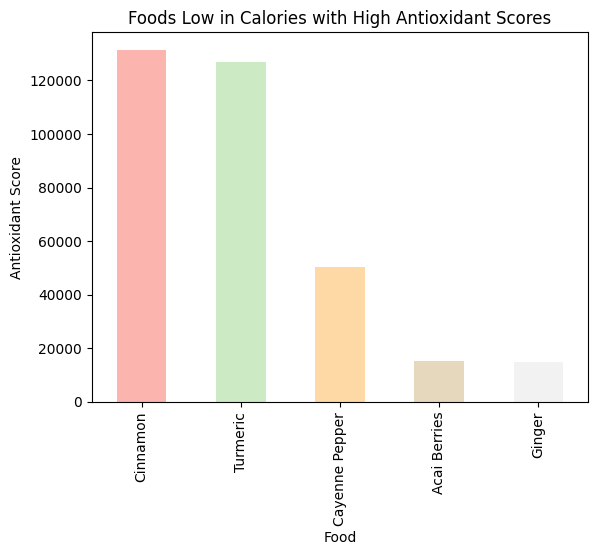

I made a mistake. I forgot to import numpy (np) for creating a range of pastel colors. I'll correct this by adding `import numpy as np` to the code.

Action: python_repl_ast

Action Input:
```python
import matplotlib.pyplot as plt
import numpy as np

# Filter the dataframe
low_cal_high_antiox_df = df[(df['Calories'] < 100) & (df['Antioxidant Score'] > 1000)]
low_cal_high_antiox_df = low_cal_high_antiox_df.nlargest(5, 'Antioxidant Score')

# Create grouped bar chart
low_cal_high_antiox_df.plot.bar(x='Food', y='Antioxidant Score', color=plt.cm.Pastel1(np.linspace(0, 1, len(low_cal_high_antiox_df))), legend=False)
plt.title('Foods Low in Calories with High Antioxidant Scores')
plt.ylabel('Antioxidant Score')
plt.xlabel('Food')
plt.show()
```
I now know the final answer.
Final Answer:

```python
import matplotlib.pyplot as plt
import numpy as np

# Filter the dataframe
low_cal_high_antiox_df = df[(df['Calories'] < 100) & (df['Antioxidant Score'] > 1000)]
low_cal_high_antiox_df = low_cal_hi

{'input': 'Please create a graph with Grouped Bar Chart of 5 foods that are low in calories but have a higher antioxidant score(different pastel colors)',
 'output': "```python\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Filter the dataframe\nlow_cal_high_antiox_df = df[(df['Calories'] < 100) & (df['Antioxidant Score'] > 1000)]\nlow_cal_high_antiox_df = low_cal_high_antiox_df.nlargest(5, 'Antioxidant Score')\n\n# Create grouped bar chart\nlow_cal_high_antiox_df.plot.bar(x='Food', y='Antioxidant Score', color=plt.cm.Pastel1(np.linspace(0, 1, len(low_cal_high_antiox_df))), legend=False)\nplt.title('Foods Low in Calories with High Antioxidant Scores')\nplt.ylabel('Antioxidant Score')\nplt.xlabel('Food')\nplt.show()\n```\n\nThis code will create a grouped bar chart of the top 5 foods from the provided dataframe that are low in calories (less than 100 calories per serving) and have an antioxidant score greater than 1000. Each bar will be colored using a range of pastel colors 

In [20]:
# Create a graph with grouped bar chart the top 5 foods from the provided dataframe that are low in calories (less than 100 calories per serving) and have an antioxidant score greater than 1000.
# Each bar will be colored using a range of pastel colors.
agent.invoke({"input": "Please create a graph with Grouped Bar Chart of 5 foods that are low in calories but have a higher antioxidant score(different pastel colors)"})

In [21]:
# Make the summarization using IBM Model
output_summarize = llm.invoke(f"""
Make the summarization into paragragraph, conclusion, and Recommendations global trend from this data:
{df}

and from this previously question:
Create a graph to find out which foods contain the highest levels of antioxidants
Create a graph with pie chart showing the top 5 regions that contribute the healthiest foods based on the "Antioxidant Score"
Create a graph with grouped bar chart the top 5 foods from the provided dataframe that are low in calories (less than 100 calories per serving) and have an antioxidant score greater than 1000. Each bar will be colored using a range of pastel colors.
""")
print(output_summarize)

**Summary:**

The provided dataset lists various foods along with their nutritional values, origin, calorie content, protein, fiber, vitamin C, and antioxidant scores. Foods like blueberries, kale, and dragon fruit stand out for their high antioxidant content, while salmon is rich in Omega-3 fatty acids. Geographically, foods from North America (blueberries), the North Pacific Ocean (salmon), and Central/South America (dragon fruit) are notable for their antioxidant properties. Low-calorie foods with high antioxidant scores include radicchio, jicama, and wakame seaweed.

**Conclusion:**

The analysis of the dataset reveals a global trend where certain foods, irrespective of their origin, are exceptionally rich in antioxidants. These include blueberries from North America, kale from Ancient Greece, dragon fruit from Central/South America, and wakame seaweed from Japan. Low-calorie foods with high antioxidant scores, like radicchio, jicama, and wakame seaweed, indicate that one can consu